In [33]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import math
import matplotlib.pyplot as plt

In [34]:
data = np.genfromtxt("heart_attack_predictions.csv", delimiter=",", dtype=None,)
print(data.shape)
print(data)

(623028, 30)
[['Country' 'Age' 'Gender' ... 'Education_Level' 'Income_Level'
  'Heart_Attack_Outcome']
 ['Germany' '39' 'Male' ... 'Tertiary' 'Low' 'Died']
 ['Egypt' '88' 'Male' ... 'None' 'Low' 'Died']
 ...
 ['Indonesia' '32' 'Female' ... 'Primary' 'Medium' 'Survived']
 ['Spain' '62' 'Male' ... 'Primary' 'Low' 'Survived']
 ['Italy' '89' 'Female' ... 'Secondary' 'Medium' 'Died']]


In [35]:
headers=data[0]
data=data[1:]
print(headers)
print(data)


['Country' 'Age' 'Gender' 'Cholesterol_Level' 'Blood_Pressure'
 'Smoking_History' 'Alcohol_Consumption' 'Physical_Activity' 'Obesity'
 'Diabetes' 'Family_History' 'Stress_Levels' 'Dietary_Habits'
 'Heart_Attack_History' 'Chest_Pain' 'Exercise_Induced_Angina'
 'Resting_ECG' 'Max_Heart_Rate_Achieved' 'Thalassemia' 'HDL_Cholesterol'
 'LDL_Cholesterol' 'Triglycerides' 'Heart_Disease_Risk'
 'Medication_Adherence' 'Urbanization_Level' 'Air_Pollution_Exposure'
 'Access_To_Healthcare' 'Education_Level' 'Income_Level'
 'Heart_Attack_Outcome']
[['Germany' '39' 'Male' ... 'Tertiary' 'Low' 'Died']
 ['Egypt' '88' 'Male' ... 'None' 'Low' 'Died']
 ['Spain' '60' 'Female' ... 'Tertiary' 'Low' 'Survived']
 ...
 ['Indonesia' '32' 'Female' ... 'Primary' 'Medium' 'Survived']
 ['Spain' '62' 'Male' ... 'Primary' 'Low' 'Survived']
 ['Italy' '89' 'Female' ... 'Secondary' 'Medium' 'Died']]


In [36]:
data[:,2]=[0 if x=='Male' else 1 if x=='Female' else 2 for x in data[:,2]]
data[:,5]=[0 if x=='Never' else 1 if x=='Former' else 2 if x=='Current' else 3 for x in data[:,5]]
data[:,7]=[0 if x=='Sedentary' else 1 if x=='Moderate' else 2 if x=='Active' else 3 for x in data[:,7]]
data[:,8]=[0 if x=='No' else 1 if x=='Yes' else 2 for x in data[:,8]]
data[:,9]=[0 if x=='No' else 1 if x=='Yes' else 2 for x in data[:,9]]
data[:,10]=[0 if x=='No' else 1 if x=='Yes' else 2 for x in data[:,10]]
data[:,12]=[0 if x=='Unhealthy' else 1 if x=='Moderate' else 2 if x=='Healthy' else 3 for x in data[:,12]]
data[:,13]=[0 if x=='No' else 1 if x=='Yes' else 2 for x in data[:,13]]
data[:,14]=[0 if x=='No' else 1 if x=='Yes' else 2 for x in data[:,14]]
data[:,15]=[0 if x=='No' else 1 if x=='Yes' else 2 for x in data[:,15]]
data[:,16]=[0 if x=='Normal' else 1 if x=='Abnormal' else 2 for x in data[:,16]]
data[:,18]=[0 if x=='Normal' else 1 if x=='Reversible Defect' else 2 if x=='Fixed Defect' else 3 for x in data[:,18]]
data[:,23]=[0 if x=='No' else 1 if x=='Yes' else 2 for x in data[:,23]]
data[:,26]=[0 if x=='Poor' else 1 if x=='Average' else 2 if x=='Good' else 3 for x in data[:,26]]

In [37]:
inputs=np.delete(data,[0,22,24,25,27,28,29],axis=1)
inputs=inputs.astype(np.float32)
inputs=torch.from_numpy(inputs)
#inputs=torch.transpose(inputs, 0, 1)


target=data[:,-1]
target=np.array([[0,1] if x=='Survived' else [1,0] if x=='Died' else 2 for x in target],dtype='float32')
target=torch.from_numpy(target)
#target=torch.transpose(target, 0, 1)

In [38]:
print(inputs.shape)
print(target.shape)

torch.Size([623027, 23])
torch.Size([623027, 2])


In [110]:
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.relu2 = nn.ReLU()
        # self.fc3 = nn.Linear(hidden_size, hidden_size)
        # self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(hidden_size, output_size)
        # self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=-1)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        # x = self.fc3(x)
        # x = self.relu3(x)
        x = self.fc4(x)
        # x = self.sigmoid(x)
        x = self.softmax(x)
        return x

In [111]:
input_size = 23
hidden_size = 20
output_size = 2
batch_size=4000
model = SimpleNN(input_size, hidden_size, output_size)
dataset = TensorDataset(inputs[:-4000],target[:-4000])
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
testdata=TensorDataset(inputs[-4000:],target[-4000:])

In [112]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

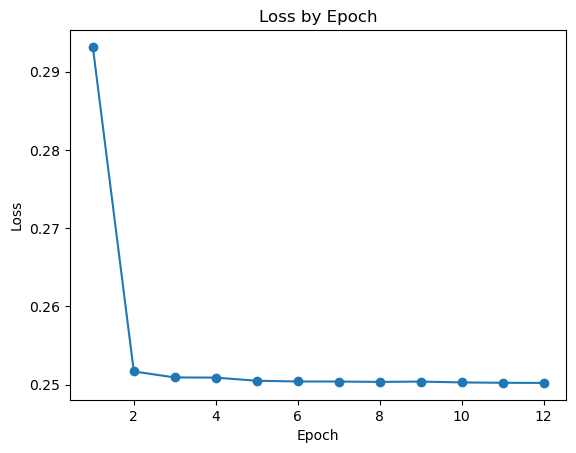

Loss:  0.2502348688340956


In [113]:
# Forward pass
epochs = 12
lossdata=[]
for epoch in range(epochs):
    epoch_loss=0
    for batch_x, batch_y in dataloader:
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)
        epoch_loss += loss.item()
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    avg_loss = epoch_loss / len(dataloader)
    lossdata.append([epoch+1,avg_loss])

lossdata=np.array(lossdata)
lossdata=np.transpose(lossdata)
x=lossdata[0,:]
y=lossdata[1,:]
plt.plot(x,y, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss by Epoch')
plt.show()
print('Loss: ',y[-1])

    


In [116]:
correct=0
for i in testdata:
    output=[0. if x<0.5 else 1.0 for x in model(i[0])]
    # print(output)
    # print(i[1].tolist())
    if i[1].tolist()==output:
        correct+=1
print(correct/4000)

0.52175
